In [2]:
!pip install matplotlib

  Using cached matplotlib-3.5.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.9 MB)
  Using cached numpy-1.22.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.8 MB)
  Using cached Pillow-9.1.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.1 MB)
  Using cached fonttools-4.33.3-py3-none-any.whl (930 kB)
  Using cached kiwisolver-1.4.2-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (1.6 MB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
You should consider upgrading via the '/home/manos/notebook/jupyterenv/bin/python -m pip install --upgrade pip' command.


In [4]:
!pip install --upgrade pip

  Using cached pip-22.1.1-py3-none-any.whl (2.1 MB)
  Attempting uninstall: pip
    Found existing installation: pip 22.0.4
    Uninstalling pip-22.0.4:
      Successfully uninstalled pip-22.0.4


In [6]:
!pip install networkx

  Using cached networkx-2.8.2-py3-none-any.whl (2.0 MB)


In [8]:
!pip install scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 MB 2.1 MB/s eta 0:00:00m eta 0:00:010:00:01


In [10]:
!pip install pandas

  Using cached pandas-1.4.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.7 MB)
  Using cached pytz-2022.1-py2.py3-none-any.whl (503 kB)


In [1]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt
import scipy
import numpy as np
import pandas as pd
import random

In [12]:
G=nx.read_edgelist('data/facebook_combined.txt',nodetype=int)

In [13]:
%store G

Stored 'G' (Graph)


In [2]:
%store -r G

In [6]:
def select_random_edges(edge_list,n):
    random_edges = []
    counter = 0
    edge_list_length = len(edge_list)
    while True:
        index = random.randint(0,edge_list_length)
        selected_edge = edge_list[index]
        if selected_edge in set(random_edges):
            continue
        random_edges.append(selected_edge)
        if counter == n:
            return random_edges
        counter += 1

In [7]:
G_co=nx.complement(G)
co_edges=G_co.edges
G_co=nx.Graph()
G_co.add_edges_from(select_random_edges(list(co_edges),len(list(G.edges))))
print(len(list(G_co.edges))==len(list(G.edges)))
%store G_co

False
Stored 'G_co' (Graph)


In [ ]:
print()

In [49]:
%store G_co

Stored 'G_co' (Graph)


In [58]:
clustering_pair={}
for node in list(G.nodes):
    clustering_pair[node]=nx.clustering(G,node)

def create_attribute(name,nxfunction,Graph):
    work=True
    if name in ["common_neighbors","Clustering Coefficient"]:
        work=False
    dict_name={}
    for u,v in Graph.edges:
        metric=nxfunction(Graph,[(u,v)])
        for_loop(dict_name,u,v,metric,work)
    nx.set_edge_attributes(Graph,dict_name,name)

def common_neighbors(Graph,list_par):
    return len(list(nx.common_neighbors(Graph,list_par[0][0],list_par[0][1])))
    
def clustering_coefficient_pair(Graph,list_par):
    return clustering_pair[list_par[0][0]]*clustering_pair[list_par[0][1]]

In [68]:
names=["common_neighbors","jaccard's coefficient","Resource allocation","Adamic/Adar","Preferential Attachment",
      "Clustering Coefficient","katz","SimRank"]
functions=[common_neighbors,nx.jaccard_coefficient,nx.resource_allocation_index,nx.adamic_adar_index,
          nx.preferential_attachment,clustering_coefficient_pair]
metrics= {names[i]: functions[i] for i in range(len(functions))}
#for i in range(len(functions)):
    #create_attribute(names[i],functions[i],G)

In [69]:
def create_dict_attribute(name,Graph):
    create_attribute(name,metrics[name],Graph)
    #%store G

In [70]:
#create_dict_attribute("common_neighbors")
#create_dict_attribute("jaccard's coefficient")
Graphs=[G,G_co]
for Graph in Graphs:
    for name in names[0:len(functions)]:
        
        def for_loop(dictionary,key1,key2,iterated_object,work=True):
            if work:
                for u,v,p in iterated_object:
                    dictionary[key1,key2]=round(p,8)
            else:
                dictionary[key1,key2]=iterated_object
                
        create_dict_attribute(name,Graph)
        print("-"*25)
    print("-"*50)
%store G
%store G_co

-------------------------
-------------------------
-------------------------
-------------------------
-------------------------
-------------------------
--------------------------------------------------



KeyboardInterrupt



In [ ]:
def add_link_existance(Graph,value):
    nodes=list(Graph.nodes)
    link_existance={}
    for i in range(len(nodes)):
        for j in range(i+1,len(nodes)):
            link_existance[nodes[i],nodes[j]] = 1 if G.has_edge(nodes[i],nodes[j]) else 0
    nx.set_edge_attributes(Graph,link_existance,"link_existance")
    %store G

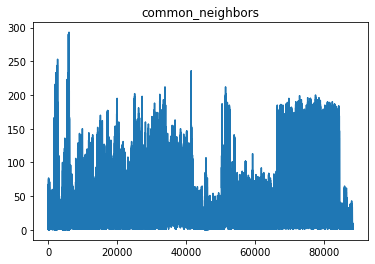

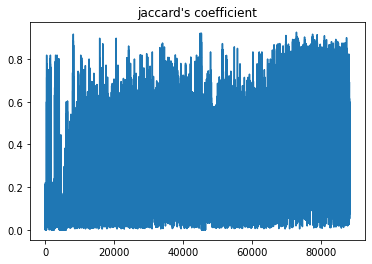

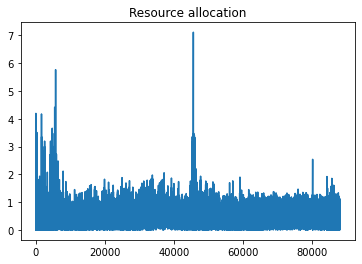

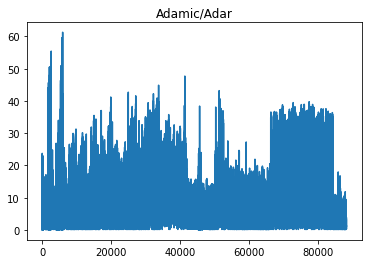

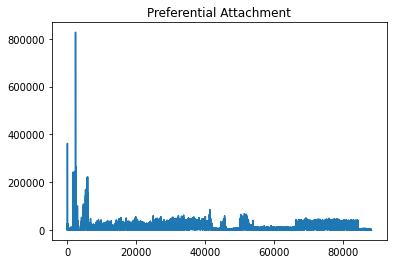

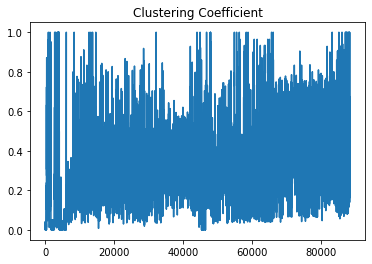

In [64]:
for name in names[0:len(functions)]:
    plt.title(name)
    plt.plot(range(len(nx.get_edge_attributes(G,name).keys())),nx.get_edge_attributes(G,name).values())
    plt.show()

In [35]:
def add_link_existance(Graph):
    nodes=list(Graph.nodes)
    link_existance={}
    for i in range(len(nodes)):
        for j in range(i+1,len(nodes)):
            link_existance[nodes[i],nodes[j]] = 1 if G.has_edge(nodes[i],nodes[j]) else 0
    nx.set_edge_attributes(Graph,link_existance,"link_existance")
    %store G

In [36]:
add_link_existance(G)

Stored 'G' (Graph)


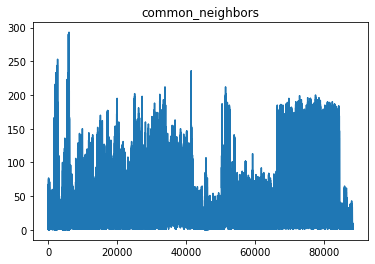

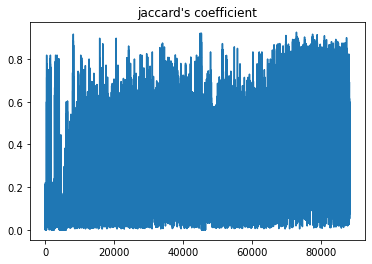

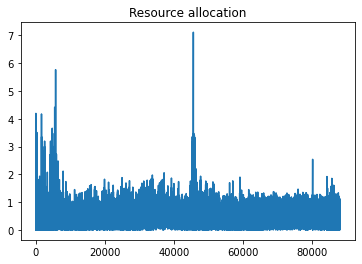

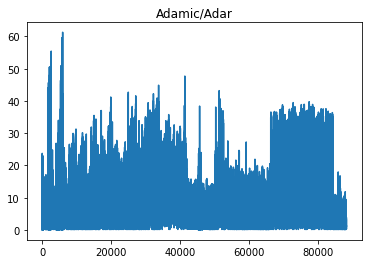

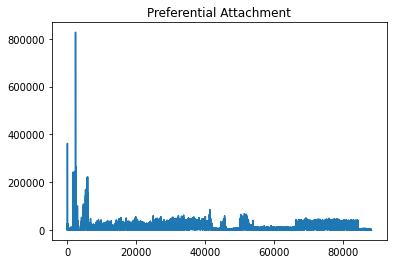

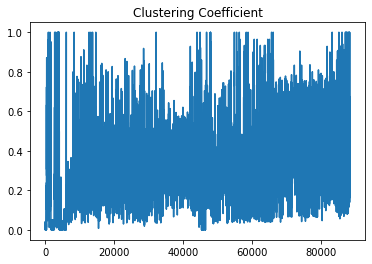

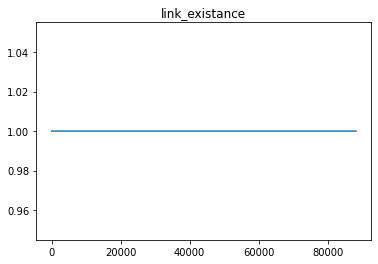

In [47]:
for name in names[0:len(functions)]+["link_existance"]:
    plt.title(name)
    plt.plot(range(len(nx.get_edge_attributes(G,name).keys())),nx.get_edge_attributes(G,name).values())
    plt.show()

In [37]:
data=nx.to_pandas_edgelist(G,nodelist=list(G.nodes))

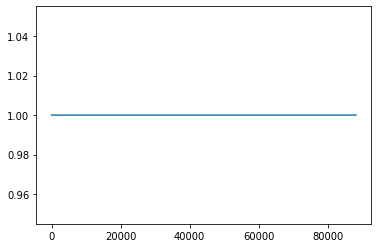

In [45]:
G_co=nx.